In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
df=pd.read_csv('jewlery_sales.csv')

In [23]:
df.head()

,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2020,1,73959,8.75,50.04,61.13
1,2020,2,71544,8.99,50.74,60.19
2,2020,3,78587,7.50,50.14,59.16
3,2020,4,80364,7.25,50.27,60.38
4,2020,5,78771,7.40,51.25,59.71


In [14]:
df.shape


(36, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          36 non-null     int64  
 1   Month         36 non-null     int64  
 2   units_sold    36 non-null     int64  
 3   dollar_price  36 non-null     float64
 4   advertisment  36 non-null     float64
 5   promotions    36 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.8 KB


In [24]:
df[['units_sold','dollar_price','advertisment','promotions']].describe()

,units_sold,dollar_price,advertisment,promotions
count,36.000000,36.000000,36.000000,36.000000
mean,75735.861111,8.130417,50.341667,61.197778
std,6699.779293,0.735714,1.076469,2.452616
min,55670.000000,5.250000,48.000000,58.000000
25%,72403.750000,7.900000,50.040000,59.815000
50%,75268.000000,8.275000,50.550000,60.285000
75%,78512.750000,8.537500,50.840000,61.500000
max,91504.000000,9.250000,54.000000,68.500000


## since mean and median are almost same therefore the data could be normally distriuted for the above features


array([[<AxesSubplot:title={'center':'units_sold'}>,
        <AxesSubplot:title={'center':'dollar_price'}>],
       [<AxesSubplot:title={'center':'advertisment'}>,
        <AxesSubplot:title={'center':'promotions'}>]], dtype=object)

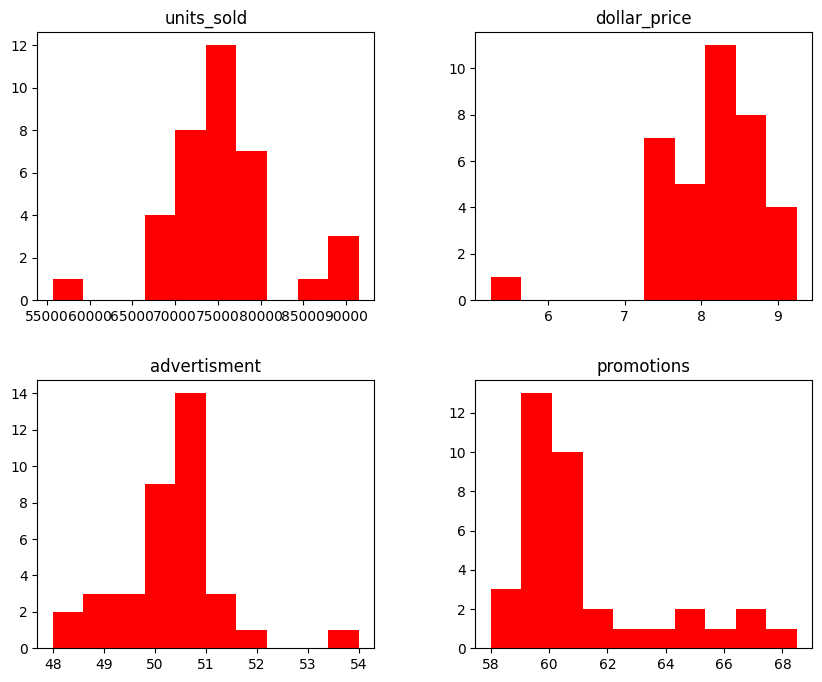

In [25]:
df[['units_sold','dollar_price','advertisment','promotions']].hist(figsize=(10,8),grid=False,color='red')

<AxesSubplot:title={'center':'units sold'}, ylabel='Density'>

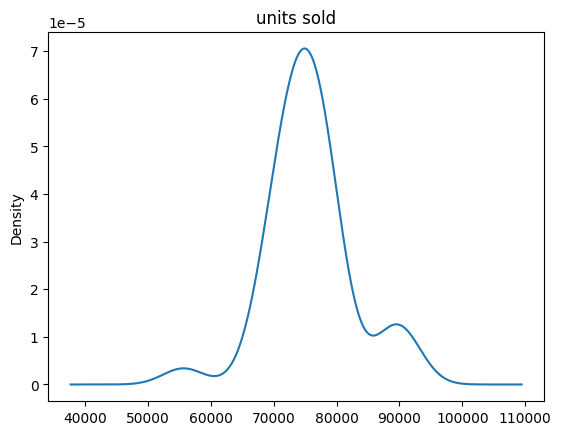

In [26]:
df['units_sold'].plot.kde(title='units sold')

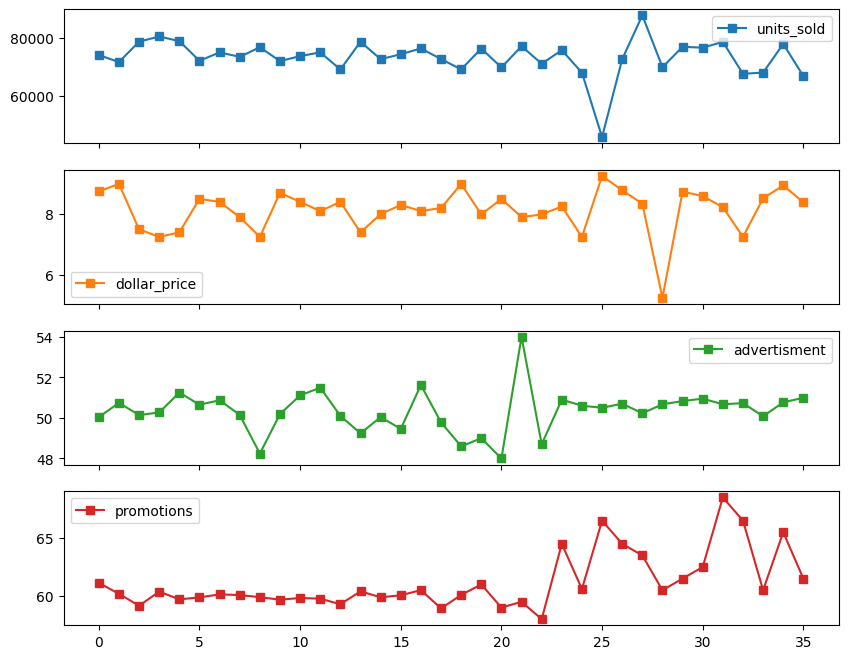

In [15]:
df[['units_sold','dollar_price','advertisment','promotions']].plot.line(figsize=(10,8),subplots=True,marker='s');

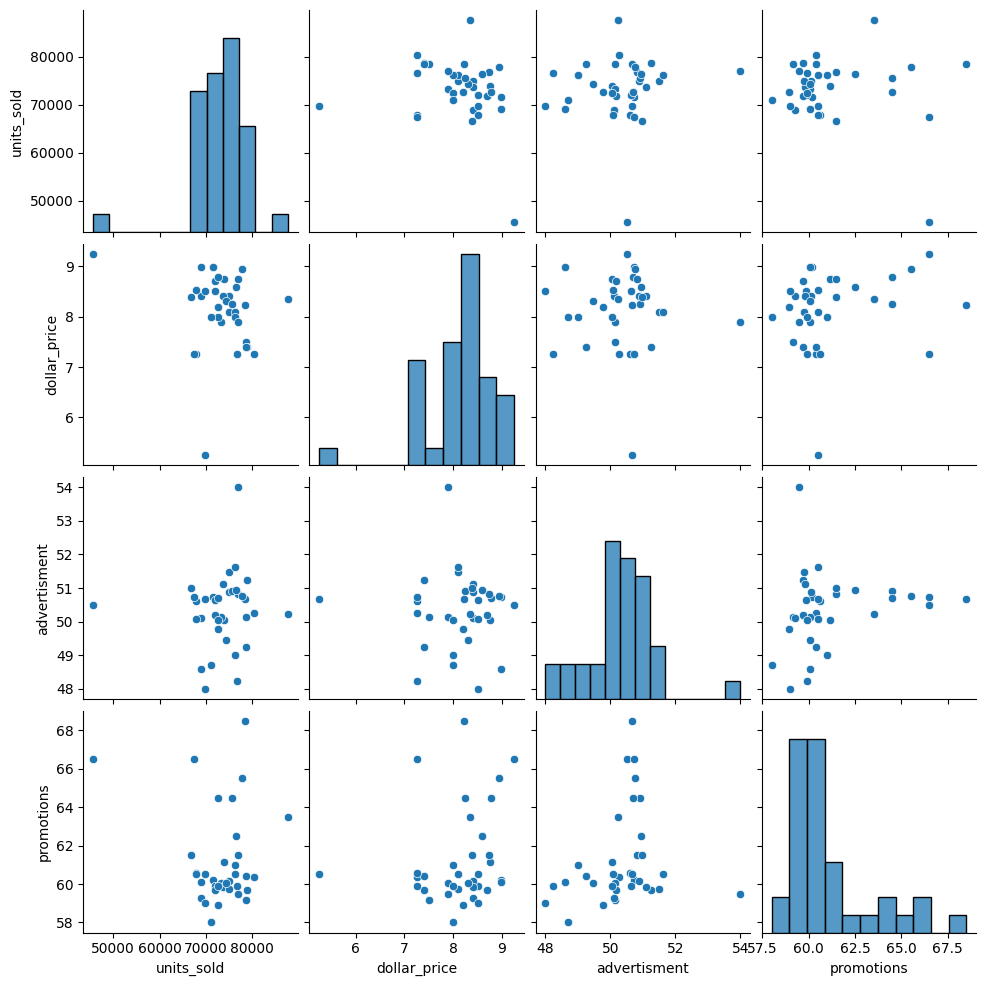

In [16]:
sns.pairplot(df[['units_sold','dollar_price','advertisment','promotions']])

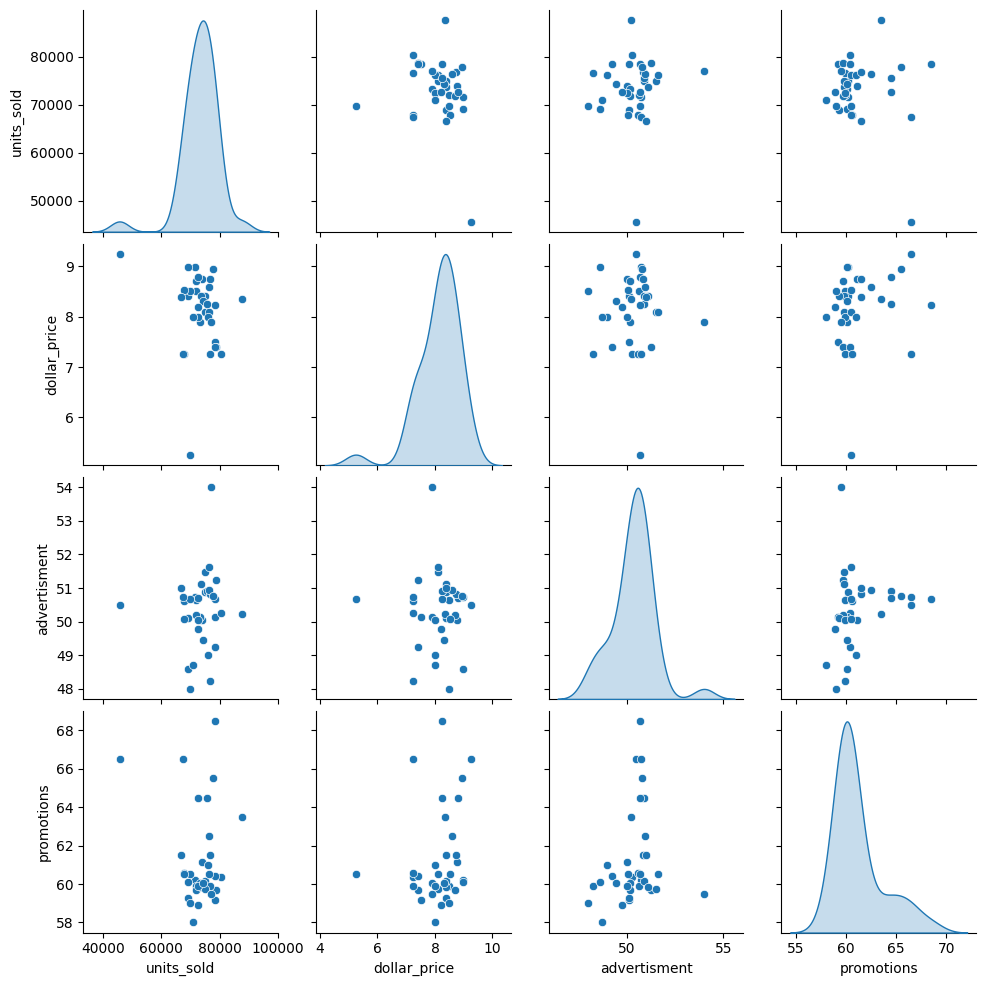

In [17]:
sns.pairplot(df[['units_sold','dollar_price','advertisment','promotions']],diag_kind='kde')

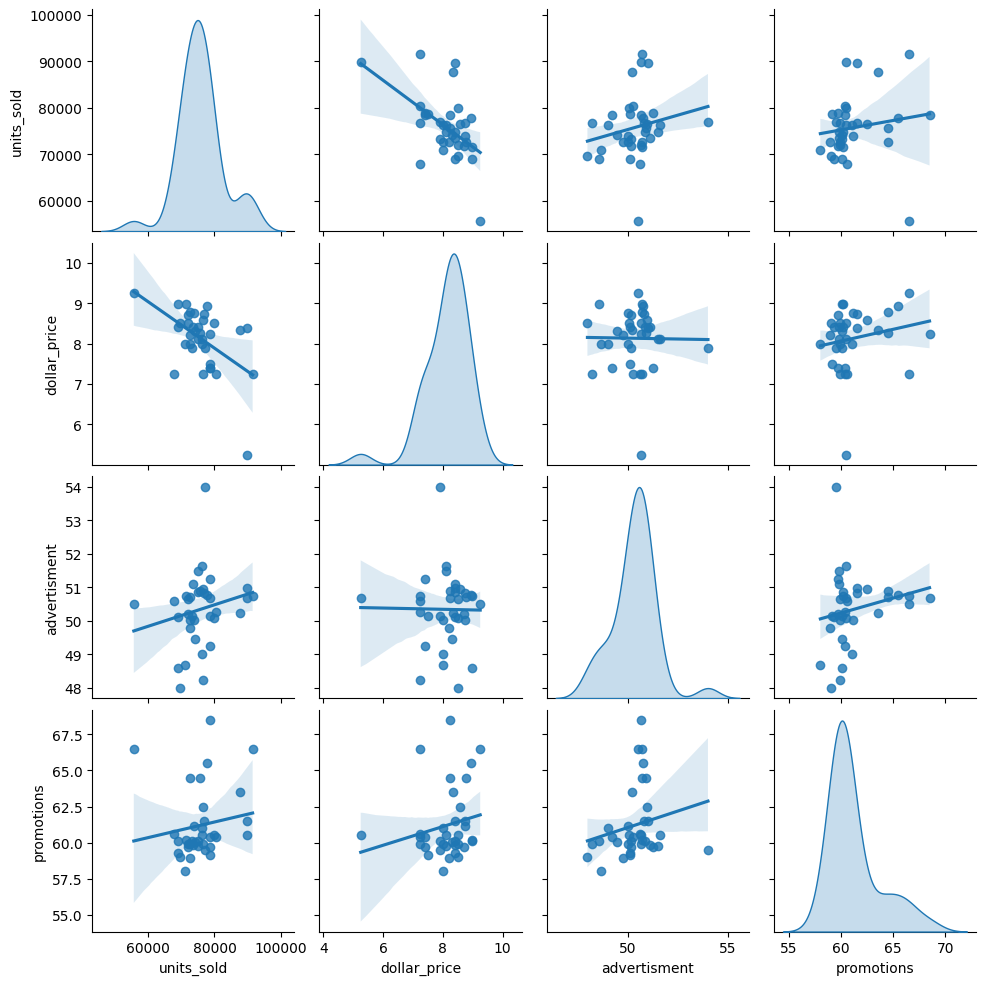

In [27]:
sns.pairplot(df[['units_sold','dollar_price','advertisment','promotions']],diag_kind='kde',kind='reg')

<AxesSubplot:>

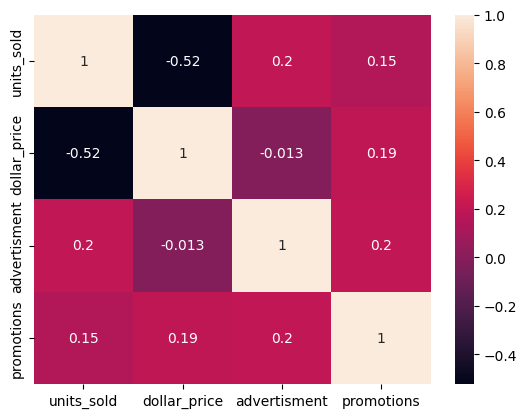

In [28]:
sns.heatmap(df[['units_sold','dollar_price','advertisment','promotions']].corr(),annot=True)

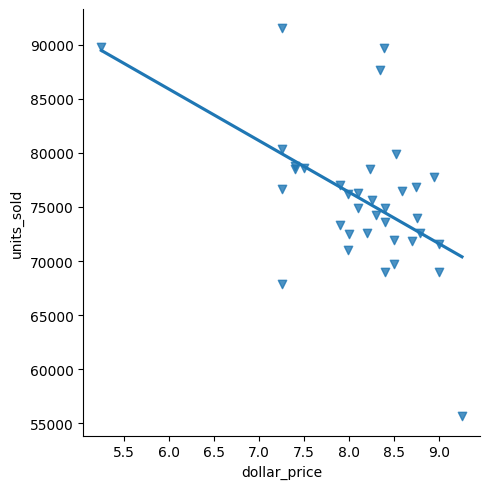

In [29]:
sns.lmplot(x='dollar_price',y='units_sold',data=df,order=1,markers=['v'],ci=False)

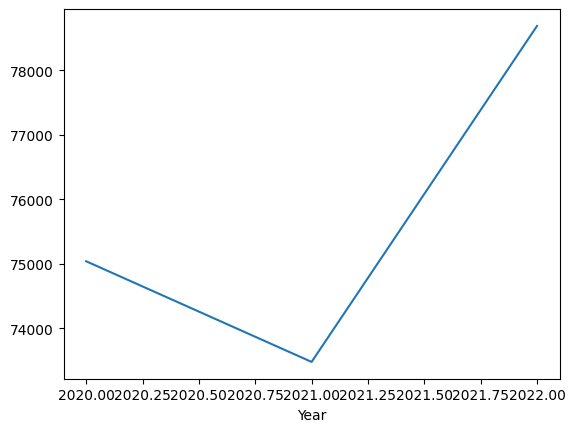

In [30]:
df.groupby('Year')['units_sold'].mean().sort_index().round(2).plot(kind='line');
#xtick()

## Training the model:

In [31]:
X=df.drop('units_sold',axis=1)
y=df[['units_sold']]

In [32]:
X.drop(['Year','Month'],axis=1,inplace=True)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [81]:
x_train.columns


Index(['dollar_price', 'advertisment', 'promotions'], dtype='object')

In [82]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 29 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dollar_price  28 non-null     float64
 1   advertisment  28 non-null     float64
 2   promotions    28 non-null     float64
dtypes: float64(3)
memory usage: 896.0 bytes


In [83]:
x_test

,dollar_price,advertisment,promotions
30,8.59,50.95,62.50
34,8.94,50.77,65.50
28,5.25,50.67,60.50
3,7.25,50.27,60.38
19,7.99,49.00,61.00
17,8.20,49.78,58.93
21,7.90,54.00,59.50
23,8.25,50.90,64.50


In [39]:
y_pred=model.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.7388383635858914

In [41]:
from sklearn.metrics import mean_squared_error

In [44]:
import numpy as np

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

2459.679112009479

In [47]:
import math
print(mean_absolute_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

2090.837098901102
2459.679112009479


In [48]:
df2 = pd.DataFrame(data =np.round(np.array(y_pred),2), 
                  columns=['Predicted'])

In [49]:
df2

,Predicted
0,74668.01
1,73953.57
2,92215.65
3,80276.83
4,74678.92
5,73498.18
6,81186.69
7,77536.49


In [50]:
y_test

,units_sold
30,76504
34,77809
28,89780
3,80364
19,76200
17,72582
21,77005
23,75643


In [51]:
df2['Actual']=y_test['units_sold'].reset_index().drop('index',axis=1)

In [52]:
df2

,Predicted,Actual
0,74668.01,76504
1,73953.57,77809
2,92215.65,89780
3,80276.83,80364
4,74678.92,76200
5,73498.18,72582
6,81186.69,77005
7,77536.49,75643


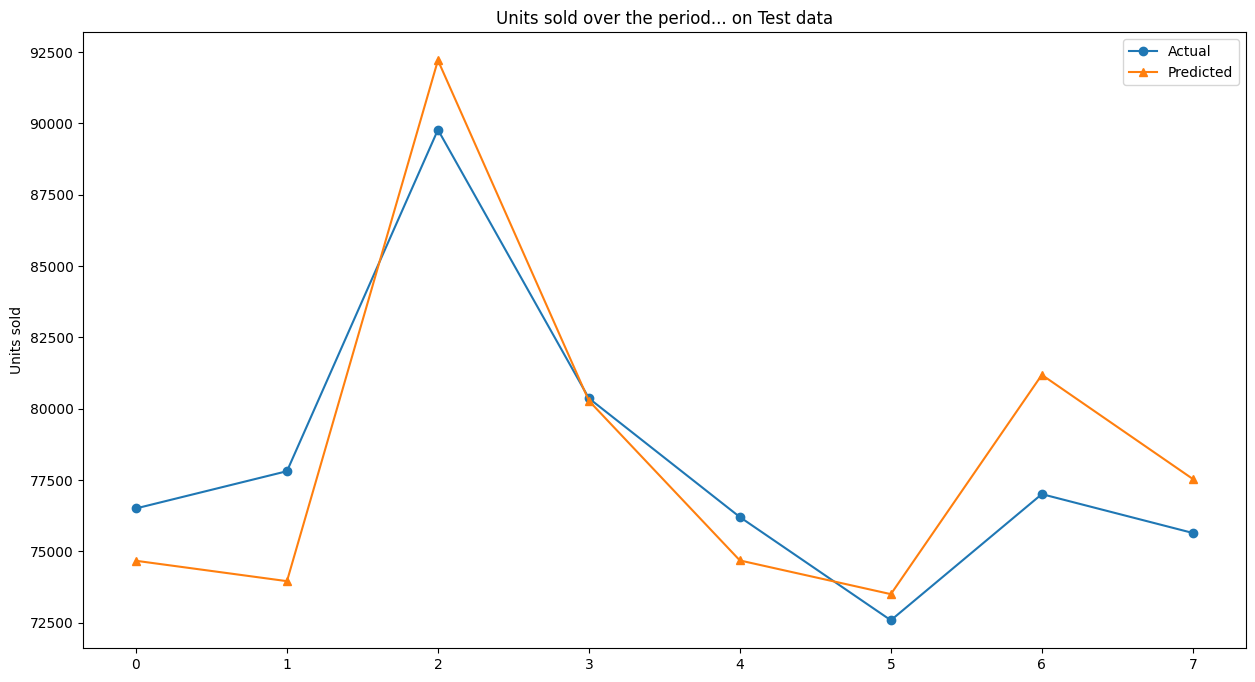

In [53]:
plt.figure(figsize=(15,8))

plt.plot(df2['Actual'],marker='o',label='Actual')
plt.plot(df2['Predicted'],marker='^',label='Predicted')

plt.ylabel('Units sold')
plt.title('Units sold over the period... on Test data')
plt.legend()
plt.show()

In [55]:
model.coef_

array([[-5668.99301189,  1350.79908886,   504.28488806]])

In [56]:
model.intercept_

array([23023.63719977])

,dollar_price,advertisment,promotions
0,-5668.993012,1350.799089,504.284888


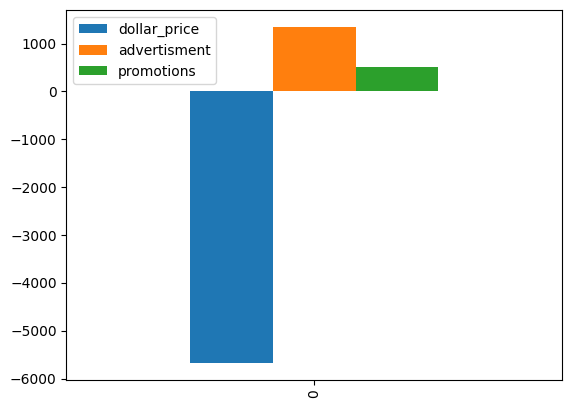

In [76]:
coeffs = pd.DataFrame(model.coef_,columns = ['dollar_price','advertisment','promotions'])
display(coeffs)
coeffs.plot(kind = "bar");

In [78]:
import pickle

In [79]:
filename = 'lm_jewelry_sold.sav' # name of the file 
pickle.dump(model, open(filename, 'wb')) # exporting the file

print("file exported")

file exported


## Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [58]:
clf = Ridge(alpha=1.0)

In [59]:
clf.fit(x_train, y_train)

Ridge()

In [61]:
y_pred2=clf.predict(x_test)

In [62]:
r2_score(y_test, y_pred2)

0.800642529481096

## This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. 

## Ridge
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

## As can be seen by the R^2 Value ... its improves for Ridge Regression Analysis.

In [63]:
df3 = pd.DataFrame(data =np.round(np.array(y_pred2),2), 
                  columns=['Predicted_ridge'])

In [64]:
df3['Actual']=y_test['units_sold'].reset_index().drop('index',axis=1)

In [65]:
df3

,Predicted_ridge,Actual
0,74818.49,76504
1,74284.62,77809
2,90407.52,89780
3,79697.04,80364
4,74618.29,76200
5,73540.79,72582
6,80763.69,77005
7,77458.64,75643


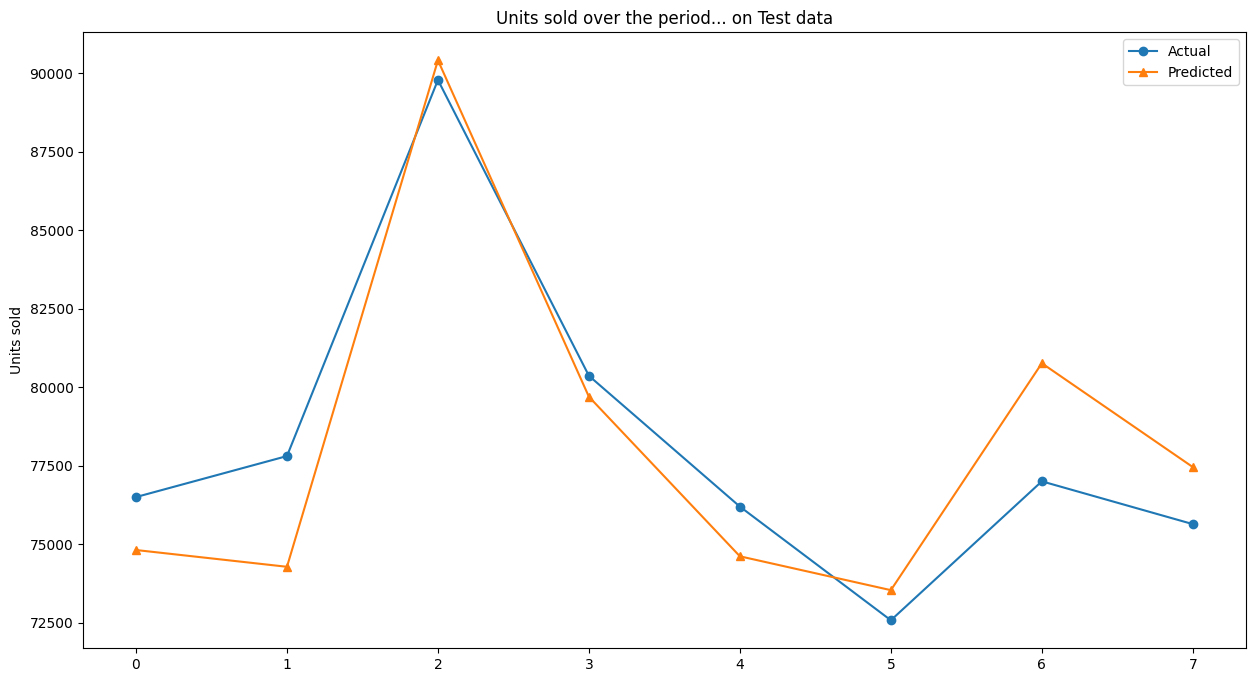

In [66]:
plt.figure(figsize=(15,8))

plt.plot(df3['Actual'],marker='o',label='Actual')
plt.plot(df3['Predicted_ridge'],marker='^',label='Predicted')

plt.ylabel('Units sold')
plt.title('Units sold over the period... on Test data')
plt.legend()
plt.show()

In [72]:
clf.coef_

array([[-5068.81113163,  1284.99208491,   490.50275115]])

,dollar_price,advertisment,promotions
0,-5068.811132,1284.992085,490.502751


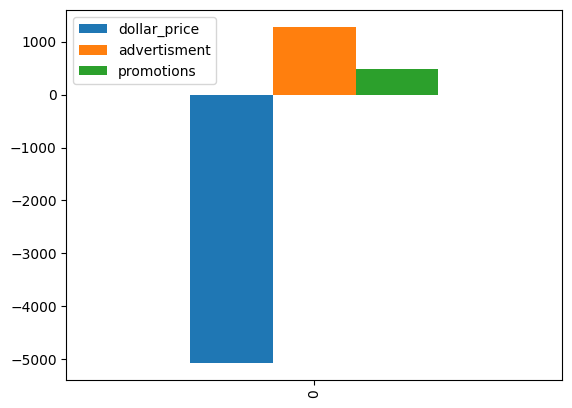

In [74]:
coeffs = pd.DataFrame(clf.coef_,columns = ['dollar_price','advertisment','promotions'])
display(coeffs)
coeffs.plot(kind = "bar");

In [80]:
filename = 'Ridge_jewelry_sold.sav' # name of the file 
pickle.dump(clf, open(filename, 'wb')) # exporting the file

print("file exported")

file exported


## Issues:

## https://discuss.streamlit.io/t/unsupported-format-string-passed-to-numpy-ndarray-format/27543
    
##  https://dzone.com/articles/how-to-solve-a-python-3-typeerror